##1.0 Importing Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_excel("/content/Mole Fraction Composition with noise.xlsx")

In [7]:
df.shape

(961, 19)

### 1.1 Removing unwanted columns if necessary, take note on the input shape later

In [8]:
# The values of these columns are mostly zero so I presume these features won't bring any good for the performance
df = df.drop(['T-100 - Reflux Ratio','T-100 - Duties Summary (Reboiler)'],axis= 1)

In [9]:
# Couble check on the shape
df.shape

(961, 17)

## 2.0 Exploratory Data Analysis

In [10]:
# Observe any potential useful insights such as mean, std etc.
df.describe()

,Time,Condenser - Liquid Percent Level,Condenser - Vessel Pressure,Reboiler - Vessel Liq Percent Level,Feed2 - Mass Flow,To Reboiler - Mass Flow,To Condenser - Mass Flow,Main Tower - Stage Liq Net Mass Flow (2__Main Tower),To Reboiler - Master Comp Mole Frac (TetraHyFuran),Feed2 - Master Comp Mole Frac (TetraHyFuran),Feed2 - Master Comp Mole Frac (Toluene),Main Tower - Stage Temperature (5__Main Tower),T-100 - Stage Pressure (5__Main Tower),T-100 - Botttom Stage Temp Est,T-100 - Top Stage Temp Est,To Condenser - Master Comp Mole Frac (TetraHyFuran),To Condenser - Master Comp Mole Frac (Toluene)
count,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000,9.610000e+02,9.610000e+02,961.000000,961.000000,961.000000,961.000000,961.000000,961.000000
mean,14400.000000,49.994889,101.279649,49.555769,3823.335379,6865.768293,2805.781415,1053.164047,0.055029,5.010010e-01,4.989990e-01,76.835812,104.424765,110.492765,67.313865,0.964015,0.035985
std,8326.833132,0.292281,0.452364,6.118368,511.213382,755.410384,259.579392,4.997380,0.003787,1.133017e-14,1.116355e-14,0.334343,0.280159,0.280159,0.280159,0.008473,0.008473
min,0.000000,48.907668,97.702103,36.812829,3004.403494,5653.363002,2134.576770,1013.589114,0.028320,5.010010e-01,4.989990e-01,75.991528,103.930595,109.998595,66.819695,0.950885,0.022401
25%,7200.000000,49.754926,101.033896,44.564921,3408.090531,6252.664563,2601.983148,1049.884770,0.053854,5.010010e-01,4.989990e-01,76.601021,104.183922,110.251922,67.073022,0.957287,0.028810
50%,14400.000000,50.001056,101.296977,50.455106,3722.752040,6718.275361,2756.461191,1053.220322,0.054807,5.010010e-01,4.989990e-01,76.832795,104.426582,110.494582,67.315682,0.965902,0.034098
75%,21600.000000,50.225012,101.539019,54.766717,4450.433352,7406.035409,3111.691346,1055.451884,0.056485,5.010010e-01,4.989990e-01,77.085614,104.649155,110.717155,67.538255,0.971190,0.042713
max,28800.000000,50.807513,103.848213,57.890626,4562.816420,7957.048708,3300.394030,1084.786368,0.084926,5.010010e-01,4.989990e-01,77.891430,104.929458,110.997458,67.818558,0.977599,0.049115


In [12]:
# Observe if theres any missing data (see Non-Null Count)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 17 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Time                                                  961 non-null    int64  
 1   Condenser - Liquid Percent Level                      961 non-null    float64
 2   Condenser - Vessel Pressure                           961 non-null    float64
 3   Reboiler - Vessel Liq Percent Level                   961 non-null    float64
 4   Feed2 - Mass Flow                                     961 non-null    float64
 5   To Reboiler - Mass Flow                               961 non-null    float64
 6   To Condenser - Mass Flow                              961 non-null    float64
 7   Main Tower - Stage Liq Net Mass Flow (2__Main Tower)  961 non-null    float64
 8   To Reboiler - Master Comp Mole Frac (TetraHyFuran)    961 no

### 2.1 Data Histogram

Observe how the features value are distributed, can be used to observe any abnormal values from the visualization

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb8b5cec9d0>,
      dtype=object)

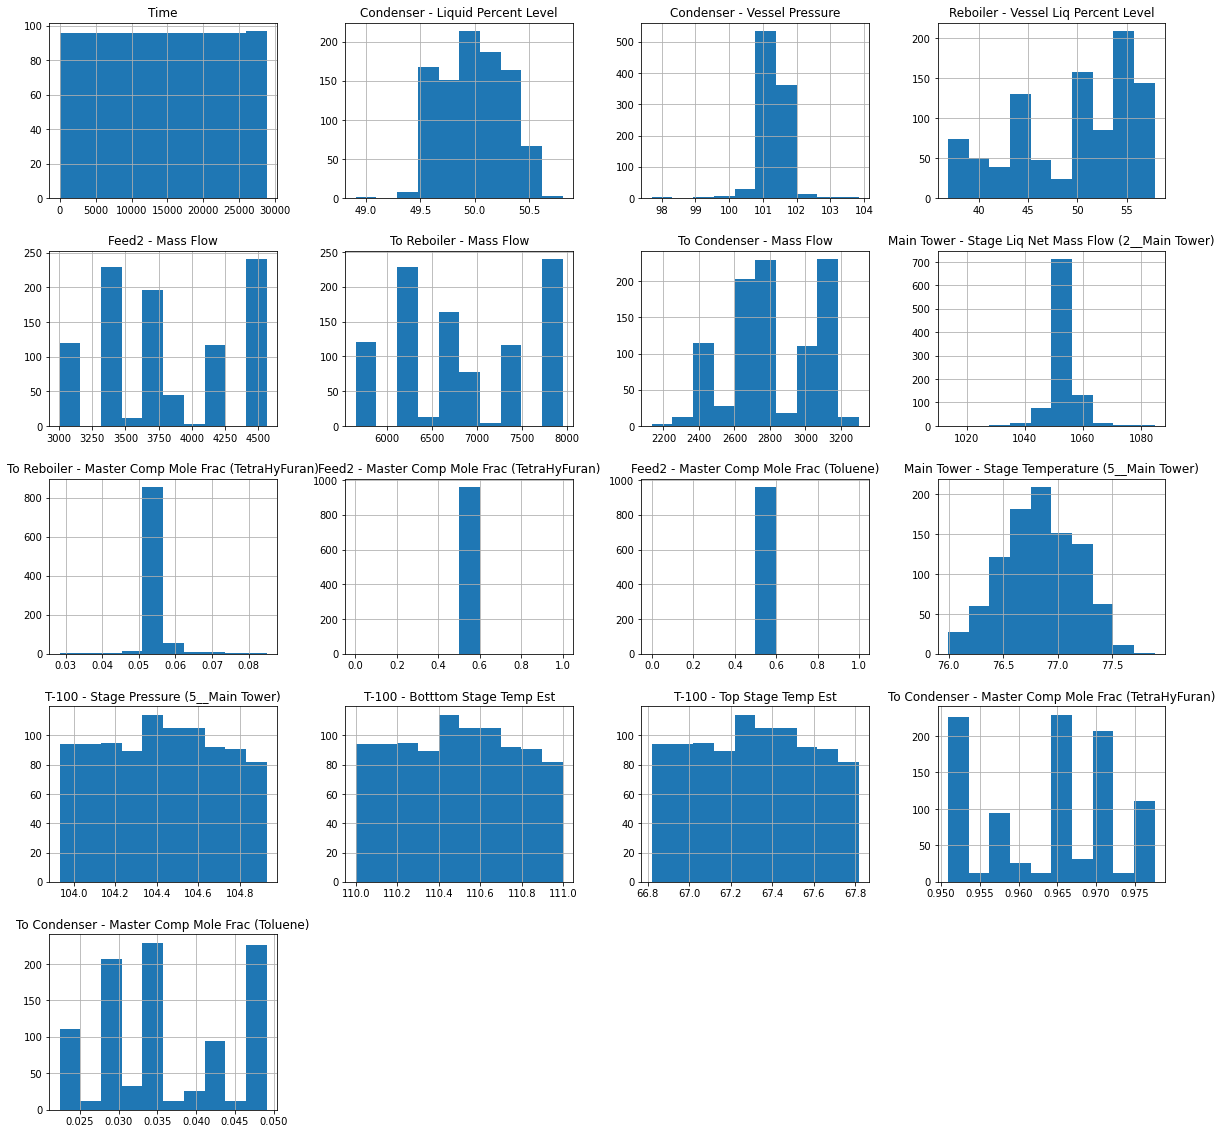

In [13]:
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
df.hist(ax = ax)

### 2.2 Data Box Plot

Boxplots are a great tool for data visualisation, they can be used to understand the distribution of your data, whether it is skewed or not, and whether any outliers are present[(McDonald, 2021) ](https://towardsdatascience.com/creating-boxplots-of-well-log-data-using-matplotlib-in-python-34c3816e73f4)

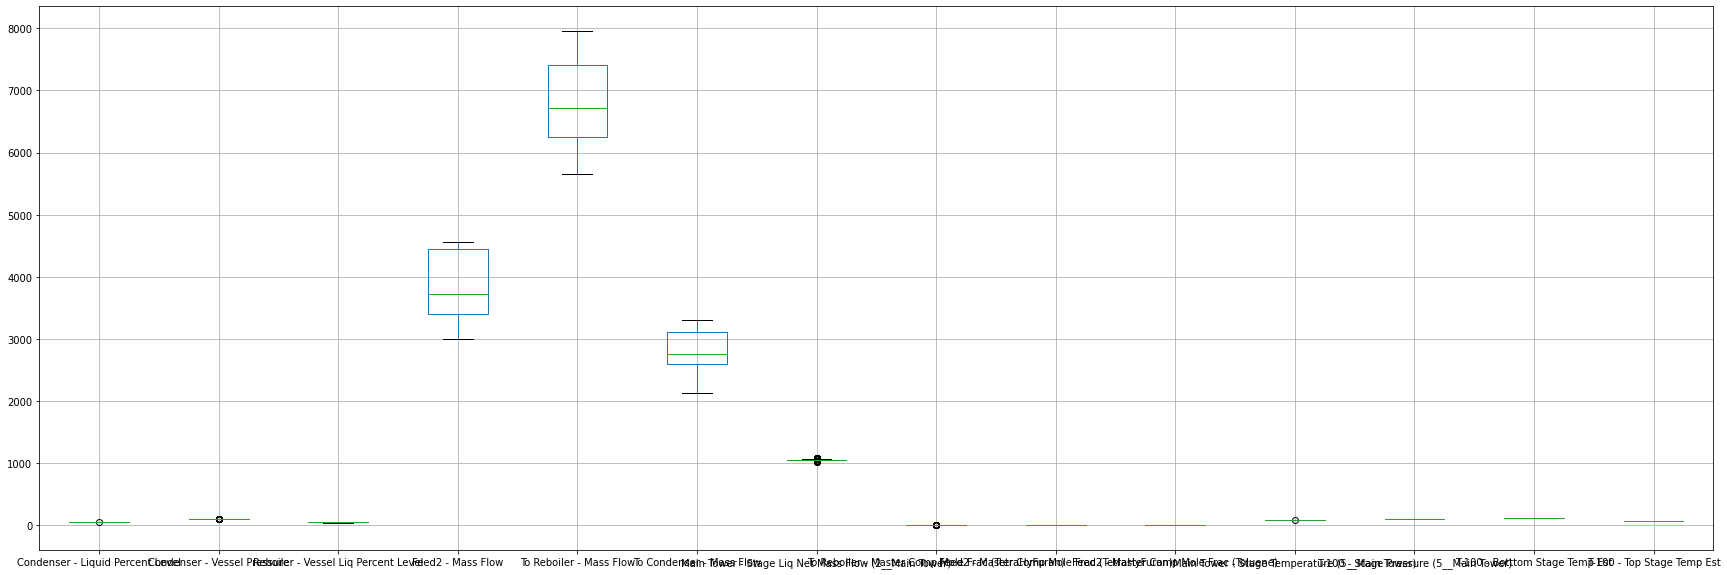

In [18]:
fig = plt.figure(figsize = (30,10))               # Assign Figure Size
ax = fig.gca()                                    # The gca() method figure module of matplotlib library is used to get the current axes.
df.iloc[:,1:-2].boxplot(ax = ax)                  # Time column is removed and only input features is included

### 2.3 Correlation overview

Observe correlation between Features and the Target

In [19]:
cor = df.iloc[:,1:].corr()            # Calculate the correlation

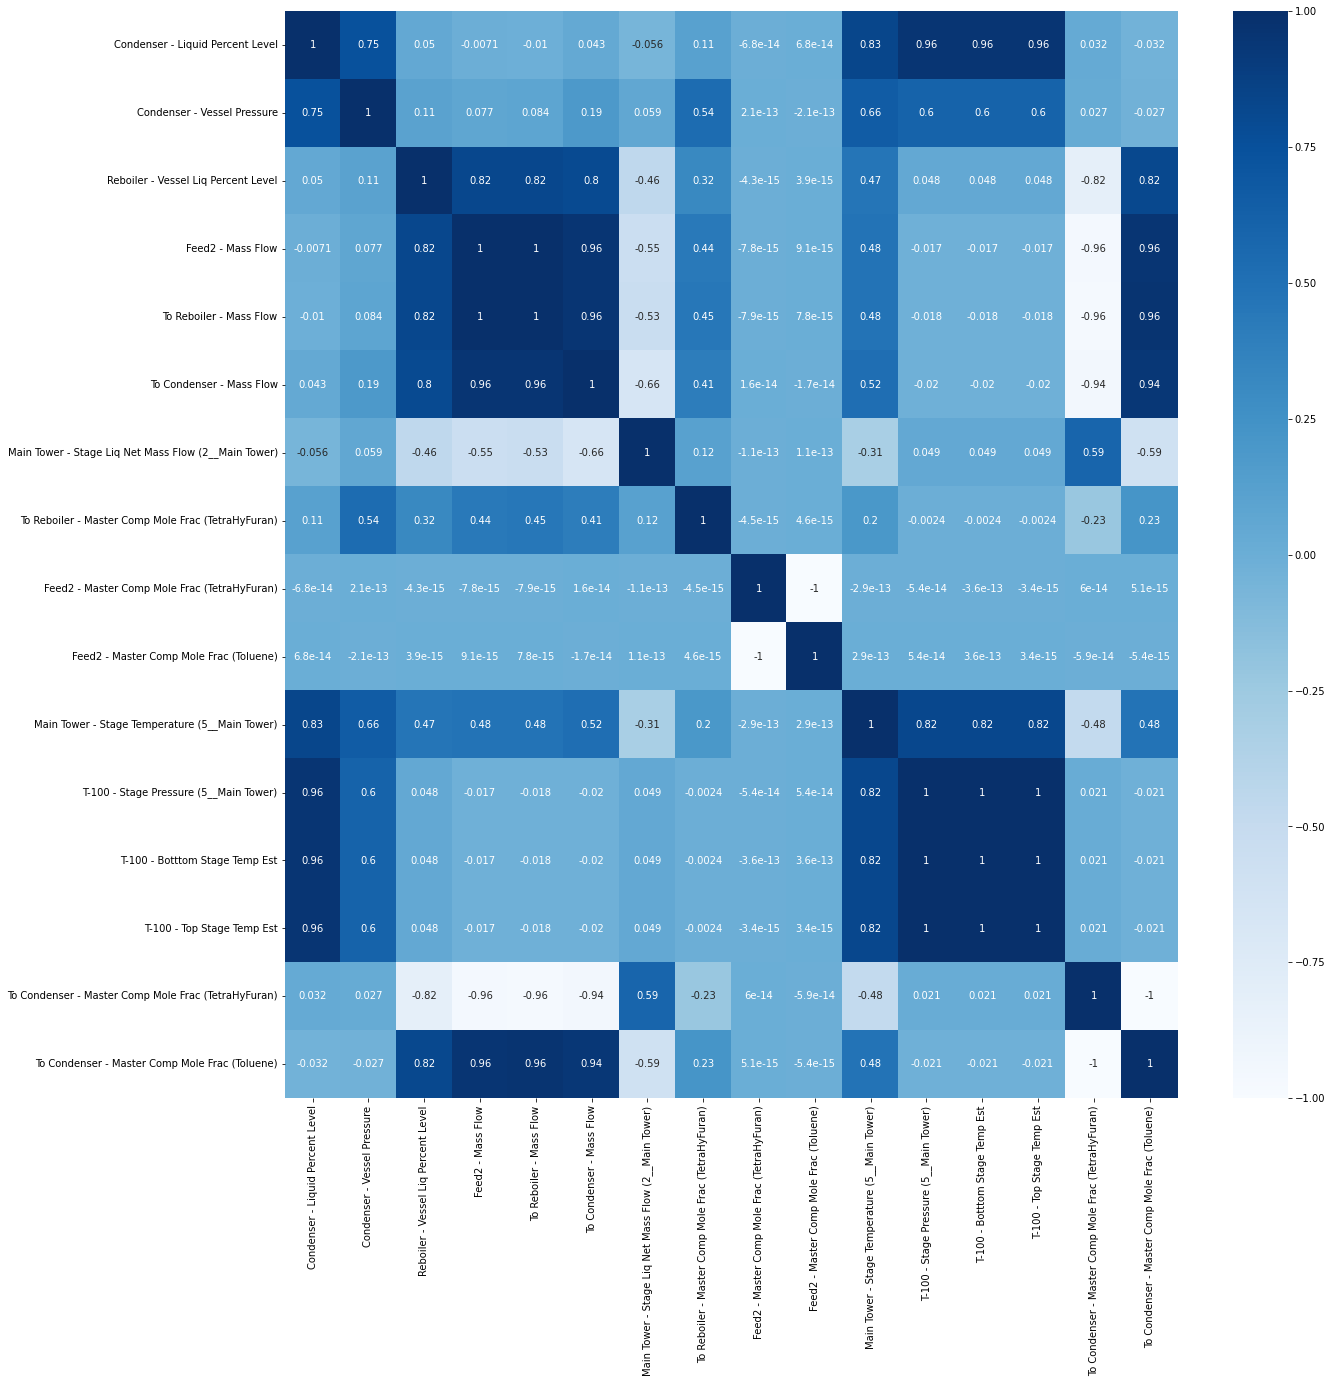

In [20]:
plt.figure(figsize=(20,20))           # Figure Size
sns.heatmap(cor,                      # Plot Pearson correlation matrix
            annot=True, 
            cmap=plt.cm.Blues)


In [24]:
#correlation with output variable
cor_target = abs(cor["To Condenser - Master Comp Mole Frac (Toluene)"])

#selecting high relevancy features
relevant_features = cor_target[cor_target>0.50]
print("[Relevant Features for Analyzer Value]\n")
print(relevant_features)

[Relevant Features for Analyzer Value]

Reboiler - Vessel Liq Percent Level                     0.815104
Feed2 - Mass Flow                                       0.959240
To Reboiler - Mass Flow                                 0.961166
To Condenser - Mass Flow                                0.941967
Main Tower - Stage Liq Net Mass Flow (2__Main Tower)    0.590366
To Condenser - Master Comp Mole Frac (TetraHyFuran)     1.000000
To Condenser - Master Comp Mole Frac (Toluene)          1.000000
Name: To Condenser - Master Comp Mole Frac (Toluene), dtype: float64


### 2.4 Skewness Analysis

* If the skewness is between -0.5 & 0.5, the data are nearly symmetrical. 

* If the skewness is between -1 & -0.5 (negative skewed) or between 0.5 & 1(positive skewed), the data are slightly skewed. 

* If the skewness is lower than -1 (negative skewed) or greater than 1 (positive skewed), the data are extremely skewed

[(Source*)](https://https://www.analyticsvidhya.com/blog/2021/05/shape-of-data-skewness-and-kurtosis/)

In [25]:
df.skew()

Time                                                    0.000000
Condenser - Liquid Percent Level                       -0.030046
Condenser - Vessel Pressure                            -1.311088
Reboiler - Vessel Liq Percent Level                    -0.520056
Feed2 - Mass Flow                                       0.111448
To Reboiler - Mass Flow                                 0.118003
To Condenser - Mass Flow                                0.058386
Main Tower - Stage Liq Net Mass Flow (2__Main Tower)    0.258576
To Reboiler - Master Comp Mole Frac (TetraHyFuran)      0.937068
Feed2 - Master Comp Mole Frac (TetraHyFuran)            0.000000
Feed2 - Master Comp Mole Frac (Toluene)                 0.000000
Main Tower - Stage Temperature (5__Main Tower)         -0.068055
T-100 - Stage Pressure (5__Main Tower)                 -0.010878
T-100 - Botttom Stage Temp Est                         -0.010878
T-100 - Top Stage Temp Est                             -0.010878
To Condenser - Master Com

In [126]:
#   As we can see, the feature 'Condenser - Vessel Pressure' has the highest skewness value, considering that it doesnt have significant correlation with the
# target, I believe it is safe to just drop the column

df = df.drop(['Condenser - Vessel Pressure'],axis = 1)

### 2.5 Data Splitting

In [127]:
from sklearn.model_selection import train_test_split


X = df.iloc[:,:-2].values
y = df.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state = None,
                                                    )

### 2.6 Data Standardization

Ensures all the data in the same scale

In [128]:
from sklearn.preprocessing import StandardScaler

scaler     = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)                # Fit and transform the training set 
X_test_sc  = scaler.transform(X_test)                     # Only transform the test set



'''
[Why fit_transform() on training data and transform() only for test set]

  > fit_transform()
    - use in training set to scale the data and the fit method learn the scaling parameter
    - the model learn the mean and standard deviation of the features in the training set
    - those parameter will be the reference for transforming the test set

  > transform()
    - use the mean and standard deviation from the training data to transform the test data

p/s sc stands for 'scaled'    
'''

#### 2.6.1 Skewness Analysis

In [129]:
pd.DataFrame(X_test_sc).skew()

0    -0.065882
1    -0.025413
2    -0.553834
3     0.122361
4     0.124635
5     0.049775
6     0.038415
7     0.519255
8     0.000000
9     0.000000
10    0.015237
11    0.029243
12    0.029243
13    0.029243
dtype: float64

In [130]:
pd.DataFrame(X_train_sc).skew()

0     0.016281
1    -0.028458
2    -0.513306
3     0.111355
4     0.119044
5     0.060818
6     0.326042
7     1.077246
8     0.000000
9     0.000000
10   -0.089511
11   -0.018246
12   -0.018246
13   -0.018246
dtype: float64

#### 2.6.2 Correlation Matrix

In [131]:
df.columns

Index(['Time', 'Condenser - Liquid Percent Level',
       'Reboiler - Vessel Liq Percent Level', 'Feed2 - Mass Flow',
       'To Reboiler - Mass Flow', 'To Condenser - Mass Flow',
       'Main Tower - Stage Liq Net Mass Flow (2__Main Tower)',
       'To Reboiler - Master Comp Mole Frac (TetraHyFuran)',
       'Feed2 - Master Comp Mole Frac (TetraHyFuran)',
       'Feed2 - Master Comp Mole Frac (Toluene)',
       'Main Tower - Stage Temperature (5__Main Tower)',
       'T-100 - Stage Pressure (5__Main Tower)',
       'T-100 - Botttom Stage Temp Est', 'T-100 - Top Stage Temp Est',
       'To Condenser - Master Comp Mole Frac (TetraHyFuran)',
       'To Condenser - Master Comp Mole Frac (Toluene)'],
      dtype='object')

In [132]:
input_columns = ['Time', 'Condenser - Liquid Percent Level',
                  #'Condenser - Vessel Pressure', 
                 'Reboiler - Vessel Liq Percent Level',
                  'Feed2 - Mass Flow', 'To Reboiler - Mass Flow',
                  'To Condenser - Mass Flow',
                  'Main Tower - Stage Liq Net Mass Flow (2__Main Tower)',
                  'To Reboiler - Master Comp Mole Frac (TetraHyFuran)',
                  'Feed2 - Master Comp Mole Frac (TetraHyFuran)',
                  'Feed2 - Master Comp Mole Frac (Toluene)',
                  'Main Tower - Stage Temperature (5__Main Tower)',
                  'T-100 - Stage Pressure (5__Main Tower)',
                  'T-100 - Botttom Stage Temp Est', 'T-100 - Top Stage Temp Est']



output_column = ['Master Comp Mole Frac (Toluene)']                  

In [133]:
x_train_sc_df = pd.DataFrame(X_train_sc,
                              columns = input_columns)

y_train_sc_df = pd.DataFrame(y_train,
                             columns = output_column)

df_scaled = pd.concat([x_train_sc_df,y_train_sc_df],axis=1)

In [152]:
corr_mat = df_scaled.corr()
corr_mat

,Time,Condenser - Liquid Percent Level,Reboiler - Vessel Liq Percent Level,Feed2 - Mass Flow,To Reboiler - Mass Flow,To Condenser - Mass Flow,Main Tower - Stage Liq Net Mass Flow (2__Main Tower),To Reboiler - Master Comp Mole Frac (TetraHyFuran),Feed2 - Master Comp Mole Frac (TetraHyFuran),Feed2 - Master Comp Mole Frac (Toluene),Main Tower - Stage Temperature (5__Main Tower),T-100 - Stage Pressure (5__Main Tower),T-100 - Botttom Stage Temp Est,T-100 - Top Stage Temp Est,Master Comp Mole Frac (Toluene)
Time,1.000000,-0.057592,-0.378418,-0.512444,-0.511440,-0.491677,0.302673,-0.177330,NaN,NaN,-0.330305,-0.054894,-0.054894,-0.054894,-0.519292
Condenser - Liquid Percent Level,-0.057592,1.000000,0.046987,-0.002936,-0.006633,0.031319,-0.044411,0.104706,NaN,NaN,0.831734,0.959225,0.959225,0.959225,-0.026181
Reboiler - Vessel Liq Percent Level,-0.378418,0.046987,1.000000,0.827023,0.827908,0.801844,-0.466195,0.318577,NaN,NaN,0.468927,0.045032,0.045032,0.045032,0.819261
Feed2 - Mass Flow,-0.512444,-0.002936,0.827023,1.000000,0.998586,0.961399,-0.556947,0.440012,NaN,NaN,0.487672,-0.013934,-0.013934,-0.013934,0.960358
To Reboiler - Mass Flow,-0.511440,-0.006633,0.827908,0.998586,1.000000,0.960745,-0.536732,0.447043,NaN,NaN,0.487698,-0.015579,-0.015579,-0.015579,0.962086
To Condenser - Mass Flow,-0.491677,0.031319,0.801844,0.961399,0.960745,1.000000,-0.681610,0.394179,NaN,NaN,0.514351,-0.031672,-0.031672,-0.031672,0.944254
Main Tower - Stage Liq Net Mass Flow (2__Main Tower),0.302673,-0.044411,-0.466195,-0.556947,-0.536732,-0.681610,1.000000,0.136219,NaN,NaN,-0.324113,0.058662,0.058662,0.058662,-0.600708
To Reboiler - Master Comp Mole Frac (TetraHyFuran),-0.177330,0.104706,0.318577,0.440012,0.447043,0.394179,0.136219,1.000000,NaN,NaN,0.187072,-0.005780,-0.005780,-0.005780,0.225834
Feed2 - Master Comp Mole Frac (TetraHyFuran),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Feed2 - Master Comp Mole Frac (Toluene),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [135]:
#correlation with output variable
cor_target = abs(cor["To Condenser - Master Comp Mole Frac (Toluene)"])

#selecting high relevancy features
relevant_features = cor_target[cor_target>0.50]
print("[Relevant Features for Analyzer Value]\n")
print(relevant_features)

[Relevant Features for Analyzer Value]

Reboiler - Vessel Liq Percent Level                     0.815104
Feed2 - Mass Flow                                       0.959240
To Reboiler - Mass Flow                                 0.961166
To Condenser - Mass Flow                                0.941967
Main Tower - Stage Liq Net Mass Flow (2__Main Tower)    0.590366
To Condenser - Master Comp Mole Frac (TetraHyFuran)     1.000000
To Condenser - Master Comp Mole Frac (Toluene)          1.000000
Name: To Condenser - Master Comp Mole Frac (Toluene), dtype: float64


#### 2.6.3 Scaled Data Box Plot

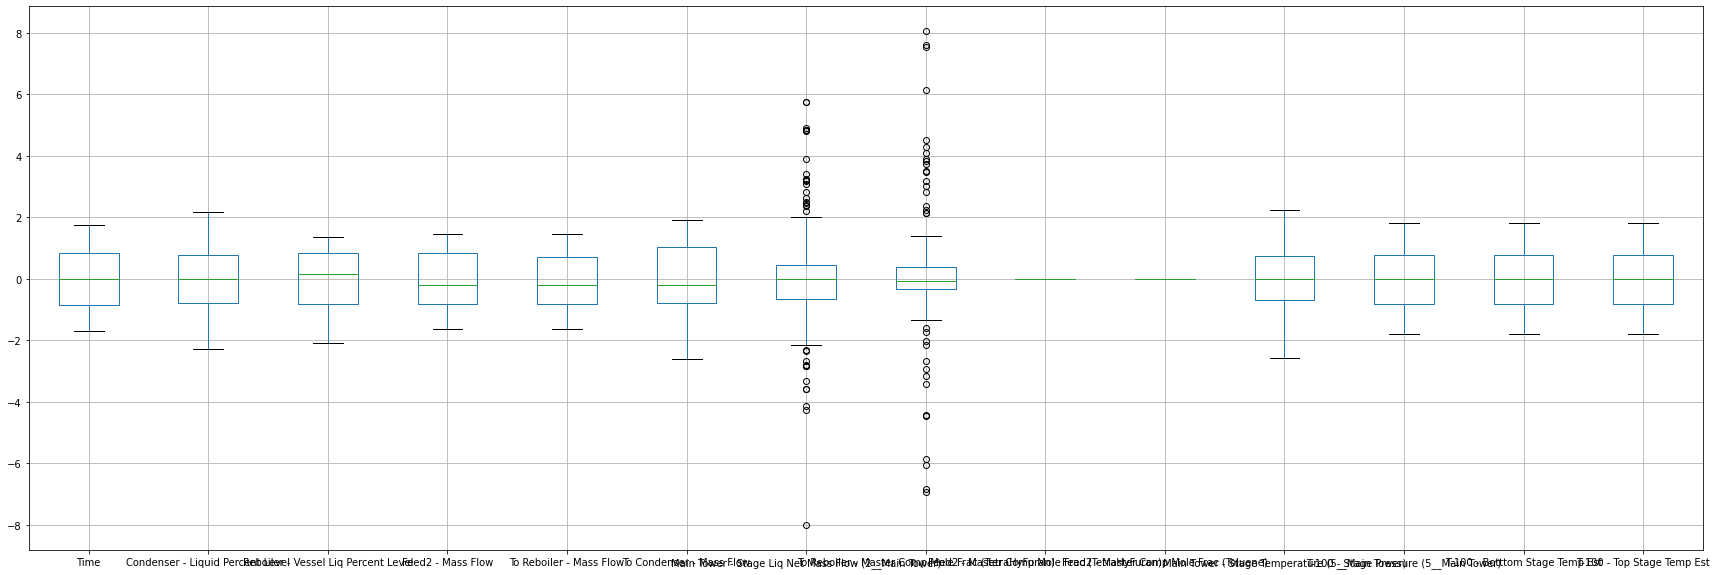

In [136]:
fig = plt.figure(figsize = (30,10))
ax = fig.gca()
x_train_sc_df.boxplot(ax = ax)

#### 2.6.4 Outliers Count

In [137]:
df_scaled.describe()

,Time,Condenser - Liquid Percent Level,Reboiler - Vessel Liq Percent Level,Feed2 - Mass Flow,To Reboiler - Mass Flow,To Condenser - Mass Flow,Main Tower - Stage Liq Net Mass Flow (2__Main Tower),To Reboiler - Master Comp Mole Frac (TetraHyFuran),Feed2 - Master Comp Mole Frac (TetraHyFuran),Feed2 - Master Comp Mole Frac (Toluene),Main Tower - Stage Temperature (5__Main Tower),T-100 - Stage Pressure (5__Main Tower),T-100 - Botttom Stage Temp Est,T-100 - Top Stage Temp Est,Master Comp Mole Frac (Toluene)
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,768.000000
mean,1.821460e-17,3.804364e-14,-5.765787e-15,-5.470161e-16,9.068845e-15,-5.325312e-15,1.705407e-14,2.409155e-14,7.549517e-15,-7.438494e-15,5.625535e-14,-2.911193e-13,-3.423506e-14,-1.883407e-13,0.036035
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,0.000000e+00,0.000000e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,0.008417
min,-1.714450e+00,-2.284483e+00,-2.076767e+00,-1.627130e+00,-1.629931e+00,-2.606089e+00,-8.016711e+00,-6.927907e+00,7.549517e-15,-7.438494e-15,-2.590312e+00,-1.798953e+00,-1.798953e+00,-1.798953e+00,0.022401
25%,-8.703530e-01,-7.982033e-01,-8.180151e-01,-8.303663e-01,-8.293395e-01,-7.910181e-01,-6.592548e-01,-3.193336e-01,7.549517e-15,-7.438494e-15,-7.001023e-01,-8.276128e-01,-8.276128e-01,-8.276128e-01,0.028808
50%,-2.783565e-03,-4.416849e-03,1.365041e-01,-2.060046e-01,-2.070928e-01,-1.974242e-01,-6.356506e-04,-6.443679e-02,7.549517e-15,-7.438494e-15,-3.322489e-03,-1.211596e-02,-1.211596e-02,-1.211596e-02,0.034096
75%,8.503415e-01,7.631164e-01,8.513779e-01,8.350696e-01,7.058094e-01,1.016983e+00,4.506632e-01,3.886905e-01,7.549517e-15,-7.438494e-15,7.420274e-01,7.729043e-01,7.729043e-01,7.729043e-01,0.041722
max,1.744994e+00,2.163268e+00,1.347502e+00,1.448626e+00,1.447419e+00,1.902675e+00,5.748287e+00,8.055691e+00,7.549517e-15,-7.438494e-15,2.219429e+00,1.811944e+00,1.811944e+00,1.811944e+00,0.049115


In [138]:
Q1  = df_scaled.quantile(0.25)  # First Quartile
Q3  = df_scaled.quantile(0.75)  # Third Quartile
IQR = Q3 - Q1



upper_outlier = df_scaled > Q3 + (1.5 * IQR)
lower_outlier = df_scaled < Q1 - (1.5 * IQR)

overall_outliers = upper_outlier | lower_outlier


In [139]:
# How many outliers
print("[TOTAL OUTLIERS]\n")
print(df_scaled[overall_outliers].count())

[TOTAL OUTLIERS]

Time                                                     0
Condenser - Liquid Percent Level                         0
Reboiler - Vessel Liq Percent Level                      0
Feed2 - Mass Flow                                        0
To Reboiler - Mass Flow                                  0
To Condenser - Mass Flow                                 0
Main Tower - Stage Liq Net Mass Flow (2__Main Tower)    32
To Reboiler - Master Comp Mole Frac (TetraHyFuran)      33
Feed2 - Master Comp Mole Frac (TetraHyFuran)             0
Feed2 - Master Comp Mole Frac (Toluene)                  0
Main Tower - Stage Temperature (5__Main Tower)           0
T-100 - Stage Pressure (5__Main Tower)                   0
T-100 - Botttom Stage Temp Est                           0
T-100 - Top Stage Temp Est                               0
Master Comp Mole Frac (Toluene)                          0
dtype: int64


## 3.0 Model Building

### 3.1  XGBoost

#### 3.1.1 Model Building

In [85]:
!pip install xgboost

     |████████████████████████████████| 173.5 MB 9.9 kB/s 


In [140]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [141]:
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train_sc, y_train)
scores_xgb = cross_val_score(estimator = xgb_reg,
                             scoring   = 'neg_mean_squared_error', 
                             X         = X_train_sc, 
                             y         = y_train, 
                             cv        = 10)

In [142]:
np.mean(scores_xgb)

-4.304603827240631e-07

#### 3.1.2 Testing XGB

In [143]:
# Test the Model
y_pred_test_xgb = xgb_reg.predict(X_test_sc)

# Evaluate Testing Performance
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


mse   = mean_squared_error(y_test, y_pred_test_xgb, sample_weight=None,squared=True)
rmse  = mean_squared_error(y_test, y_pred_test_xgb, sample_weight=None,squared=False)
r2    = r2_score(y_test, y_pred_test_xgb,sample_weight=None)


print('MSE Value: {:.5f}'.format(mse))
print('RMSE Value: {:.5f}'.format(rmse))
print('R-squared Value: {:.2f}'.format(r2))

MSE Value: 0.00000
RMSE Value: 0.00075
R-squared Value: 0.99


#### 3.1.3 Observing the Pattern

In [144]:
y_test_value          = pd.DataFrame(y_test,columns=['Y_test'])
y_pred_test_xgb_value = pd.DataFrame(y_pred_test_xgb,columns=['Predicted Analyser Value'])

import plotly.express as px 


# Plotting the chart

fig = px.line(labels = {
                  "ID",
                  "Analyser Value",
                  "Legend"
              },
              title = "Predicted Analyser Value vs Test Set (XGBoost)",)

# Test set
fig.add_scatter(y     = y_test_value['Y_test'], 
                mode  ='lines',
                name  ='Test Set'
                )

# Predicted Output
fig.add_scatter(y     = y_pred_test_xgb_value['Predicted Analyser Value'],
                mode  ='lines',
                name  ='Predicted Analyser Value'
                )

# Add Slider
fig.update_layout(xaxis=dict(rangeslider=dict(visible=True),
                             type="linear"))
# Show plot 
fig.show()

#### 3.1.4 Predicted vs Actual plot




A good model will have most of the scatter dots near the diagonal black line.

In [153]:
fig = px.scatter(x=y_test, 
                 y=y_pred_test_xgb, 
                 labels={'x': 'Actual Master Comp Mole Frac (Toluene) ', 'y': 'Predicted Master Comp Mole Frac (Toluene)'},
                 title="Predicted Value vs Test Set (XGB)")
fig.add_shape(
    type="line", line=dict(dash='dash'),
    x0=y.min(), y0=y.min(),
    x1=y.max(), y1=y.max()
)
fig.show()

### 3.2 Multi-level Perceptron

#### 3.2.1 Model Architecture

In [147]:
from sklearn.neural_network import MLPRegressor
mlp_reg = MLPRegressor(hidden_layer_sizes = 1000,
                    alpha              = 0.01,
                    max_iter           = 2000, 
                    tol                = 1e-5,
                    batch_size         = 16, 
                    verbose            =True).fit(X_train_sc, y_train)

Iteration 1, loss = 0.01077999
Iteration 2, loss = 0.00741720
Iteration 3, loss = 0.00635513
Iteration 4, loss = 0.00578133
Iteration 5, loss = 0.00492565
Iteration 6, loss = 0.00504203
Iteration 7, loss = 0.00522631
Iteration 8, loss = 0.00408631
Iteration 9, loss = 0.00327467
Iteration 10, loss = 0.00295337
Iteration 11, loss = 0.00242734
Iteration 12, loss = 0.00215414
Iteration 13, loss = 0.00189200
Iteration 14, loss = 0.00169593
Iteration 15, loss = 0.00153065
Iteration 16, loss = 0.00143256
Iteration 17, loss = 0.00120280
Iteration 18, loss = 0.00105844
Iteration 19, loss = 0.00096326
Iteration 20, loss = 0.00085102
Iteration 21, loss = 0.00079600
Iteration 22, loss = 0.00072154
Iteration 23, loss = 0.00063121
Iteration 24, loss = 0.00054415
Iteration 25, loss = 0.00048505
Iteration 26, loss = 0.00043353
Iteration 27, loss = 0.00038989
Iteration 28, loss = 0.00035091
Iteration 29, loss = 0.00031604
Iteration 30, loss = 0.00028481
Iteration 31, loss = 0.00025695
Iteration 32, los

#### 3.2.2 Loss curve

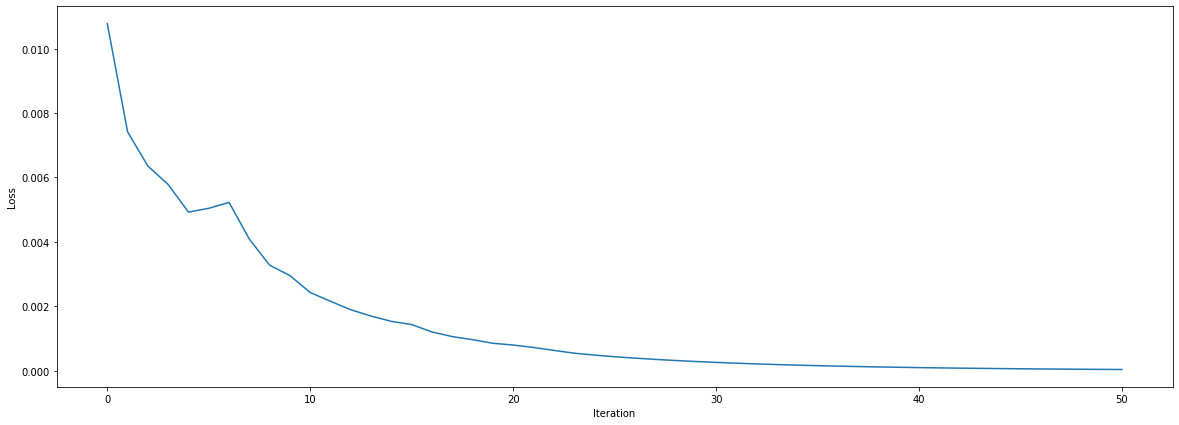

In [148]:
plt.figure(figsize=(20,7))
plt.plot(mlp_reg.loss_curve_)
plt.ylabel("Loss")
plt.xlabel("Iteration")
plt.show()

#### 3.2.3 Testing MLP

In [149]:
# Test the Model 
y_pred_test_mlp   = mlp_reg.predict(X_test_sc)

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


mse   = mean_squared_error(y_test, y_pred_test_mlp, sample_weight=None,squared=True)
rmse  = mean_squared_error(y_test, y_pred_test_mlp, sample_weight=None,squared=False)
r2    = r2_score(y_test,y_pred_test_mlp,sample_weight=None)


print('MSE Value: {:.5f}'.format(mse))
print('RMSE Value: {:.5f}'.format(rmse))
print('R-squared Value: {:.2f}'.format(r2))

MSE Value: 0.00000
RMSE Value: 0.00092
R-squared Value: 0.99


#### 3.2.4 Observing the Pattern

In [150]:
y_test_value           = pd.DataFrame(y_test,columns=['Y_test'])
y_pred_test_mlp_value  = pd.DataFrame(y_pred_test_mlp,columns=['Predicted Analyser Value'])

import plotly.express as px 


# Plot 
fig = px.line(labels = {
                  "ID",
                  "Analyser Value",
                  "Legend"
              },
              title="Predicted Value vs Test Set (MLP)",)

fig.add_scatter(y=y_test_value['Y_test'], mode='lines',name='Test Set')
fig.add_scatter(y=y_pred_test_mlp_value['Predicted Analyser Value'], mode='lines',name='Predicted Value (MLP)')

# Add Slider
fig.update_layout(xaxis=dict(rangeslider=dict(visible=True),
                             type="linear"))
# Show plot 
fig.show()

#### 3.2.5 Predicted vs Actual plot




A good model will have most of the scatter dots near the diagonal black line.

In [151]:
fig = px.scatter(x=y_test, 
                 y=y_pred_test_mlp, 
                 labels={'x': 'Actual Master Comp Mole Frac (Toluene) ', 'y': 'Predicted Master Comp Mole Frac (Toluene)'},
                 title="Predicted Value vs Test Set (MLP)")
fig.add_shape(
    type="line", line=dict(dash='dash'),
    x0=y.min(), y0=y.min(),
    x1=y.max(), y1=y.max()
)
fig.show()